In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sp
import ast
import math

In [2]:
testFS = "./src/testFS.txt"
testMSE = "./src/testMSE.txt"
testBox = "./src/testBox.txt"
testBox2 = "./src/testBox2.txt"

with open(testFS, 'r') as file:
    FSstring = file.read()

FSdata =np.array(ast.literal_eval(FSstring))

with open(testMSE, 'r') as file:
    MSEstring = file.read()
    
MSEdata = np.array(ast.literal_eval(MSEstring))

with open(testBox, 'r') as file:
    testBoxstring = file.read()
    
Boxplotdata = np.array(ast.literal_eval(testBoxstring))

with open(testBox2, 'r') as file:
    testBoxstring2 = file.read()
    
Boxplotdata2 = np.array(ast.literal_eval(testBoxstring2))



<ipython-input-2-c72ef4a9cdfa>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Boxplotdata = np.array(ast.literal_eval(testBoxstring))


## Histogram

(0, 1.4)

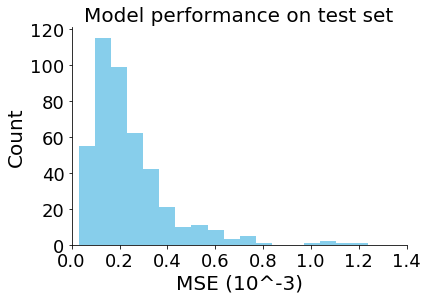

In [73]:
MSEdataScaled = MSEdata*1000
n = math.ceil((MSEdataScaled.max() - MSEdataScaled.min())/0.07)
fig, ax = plt.subplots()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.hist(MSEdataScaled, bins=n,color='skyblue')
plt.title("Model performance on test set",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xlabel("MSE (10^-3)",fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0, 1.4])

(0, 1.4)

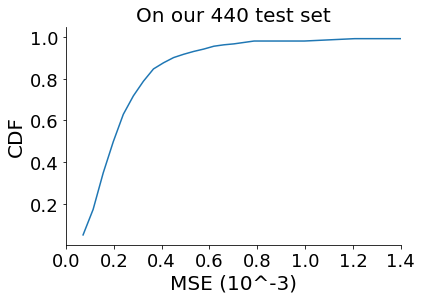

In [74]:
count,bins_count = np.histogram(MSEdataScaled, bins=40)

pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
cdf = np.cumsum(pdf)

fig, ax = plt.subplots()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plotting CDF
plt.plot(bins_count[1:], cdf, label="CDF",)
plt.title("On our 440 test set",fontsize=20)
plt.ylabel("CDF",fontsize=20)
plt.xlabel("MSE (10^-3)",fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0, 1.4])

## Scatterplot (figure 6E)

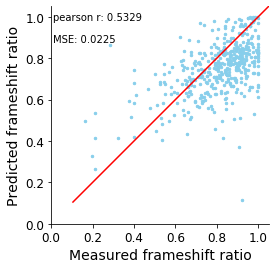

In [85]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.metrics import mean_squared_error
  
measured, predicted = FSdata[:,0], FSdata[:,1]

# Calculationg pearson r
pearsonr = sp.pearsonr(measured,predicted)[0]

# Calculation of Mean Squared Error (MSE)
MSE = mean_squared_error(measured,predicted)

#Plot measured vs. predicted frameshift ratio
fig, ax = plt.subplots()
ax.scatter(measured,predicted, c='skyblue',s=6)
ax.set_xlim((0,1.05))
ax.set_ylim((0,1.05))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
line = mlines.Line2D([0.1, 1], [0.1, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
ax.text(0.01, 0.95,"pearson r: " + str(round(pearsonr,4)),
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
ax.text(0.01, 0.85,"MSE: " + str(round(MSE,4)),
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Predicted frameshift ratio",fontsize=14)
plt.xlabel("Measured frameshift ratio",fontsize=14)
plt.show()

## Boxplot (figure S6E)

In [13]:
# fig = plt.figure(figsize =(10, 7))
# ax = fig.add_axes([0, 0, 1, 1])
# labels = ['-2+2', '-1+1','0+1','0+2','0+3','0+4','0+5','0+6','0+7','0+8','0+9','1+A','1+C','1+G','1+T','3']

# bp = ax.boxplot(Boxplotdata,labels=labels)
 
# plt.show()

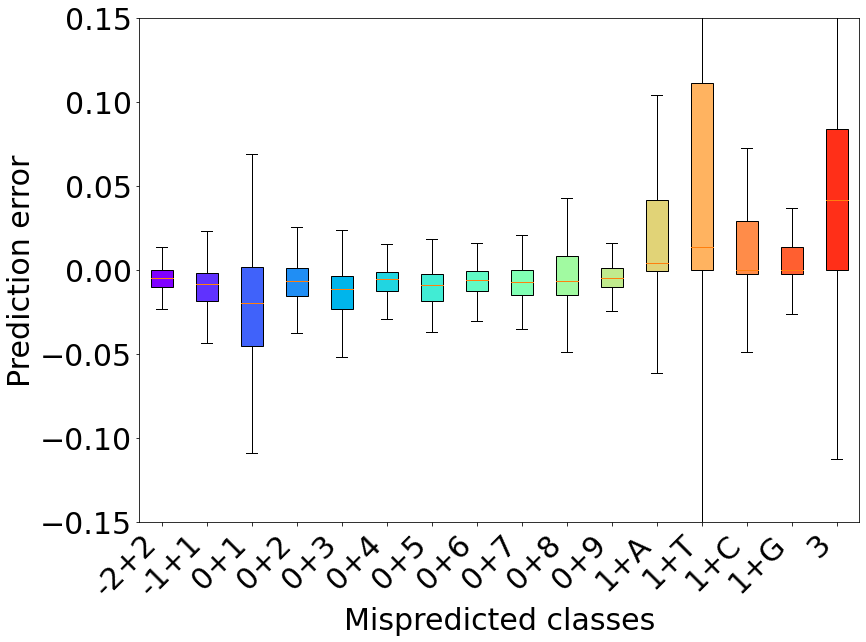

In [3]:
import matplotlib.cm as cm

dataArray = []
for i in range(0,16):
    dataArray.append(Boxplotdata2[i])
    
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
labels = ['-2+2', '-1+1','0+1','0+2','0+3','0+4','0+5','0+6','0+7','0+8','0+9','1+A', '1+T','1+C','1+G','3']

bp = ax.boxplot(dataArray,patch_artist=True,labels=labels,showfliers=False)

cm = plt.cm.get_cmap('rainbow')
colors = [cm(val/len(dataArray)) for val in range(len(dataArray))]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel("Prediction error",fontsize=30)
plt.xlabel("Mispredicted classes",fontsize=30)
plt.xticks(rotation=45, ha='right',fontsize=30)
plt.ylim([-0.15, 0.15])
plt.yticks(fontsize=30)

plt.show()